# **Lab2 task**

Use pytorch/Tensorflow to implement an specific classification DNN model, dataset Fashion MNIST

1.   Design model by keras.sequential model, 3 layer of CNN network (10%), 3 layer of NN network (10%)

1.   Comparison w/ and w/o Batch Normalizatoin Layer (10%)

1.   Comparison w/ arbitrary layer of abovementioned CNN network. (10%)

1.   Print model summary and plot model (10%)

1.   Print test accuracy, plot train-epoch, val-epoch, train-loss, val-loss (20%)
2.   Plot certain image from dataset and successively predict (10%)

1.   Report(30%)


**Q&A: course.aislab@gmail.com**








# Import from framework

In [1]:
import tensorflow as tf
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn import metrics

# Load dataset

In [2]:
# Load MNIST dataset
# Keras images are 28x28 array rather than a 1D array of size 784
# Pixels intensities are integers (0 to 255) rather than floats (0.0 to 255.0)

(train_X, train_y), (test_X, test_y) = load_data() # shape per image is (height, width, channel)    # channel = 1 for grayscale
train_X = train_X.reshape(-1, 28, 28, 1) # "-1" means auto calculate the size of 1st dimension(how many samples)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32') / 255.0 # Normalization, the purpose is to make the data between 0 and 1 -> it helps the model to converge faster
test_X = test_X.astype('float32') / 255.0

train_y = train_y.reshape(-1,1) # "-1" means auto calculate the size of 1st dimension(how many samples), and the second dimension being the number of labels per sample
test_y  = test_y.reshape(-1,1)  
# Dataset already split in Training and Testing

# Train_X for images and train_y for labels
#shape of train_X should be (10, 28, 28, 1), which is (class, height, width, channel)   ->  wrong explanation
#shape of train_y should be (10,1), which is (class, channel(only needs one to store class info)) ->    wrong explanation

In [3]:
# There are 60000 samples in training set and 10000 samples in testing set
# Each sample is a 28x28 grayscale image, associated with a label from 0 to 9
# The shape of train_X is (60000, 28, 28, 1), which is (sample, height, width, channel)
# The shape of train_y is (60000, 1), which is (sample, channel)

print("train_X.shape: ", train_X.shape)
print("train_y.shape: ", train_y.shape)

train_X.shape:  (60000, 28, 28, 1)
train_y.shape:  (60000, 1)


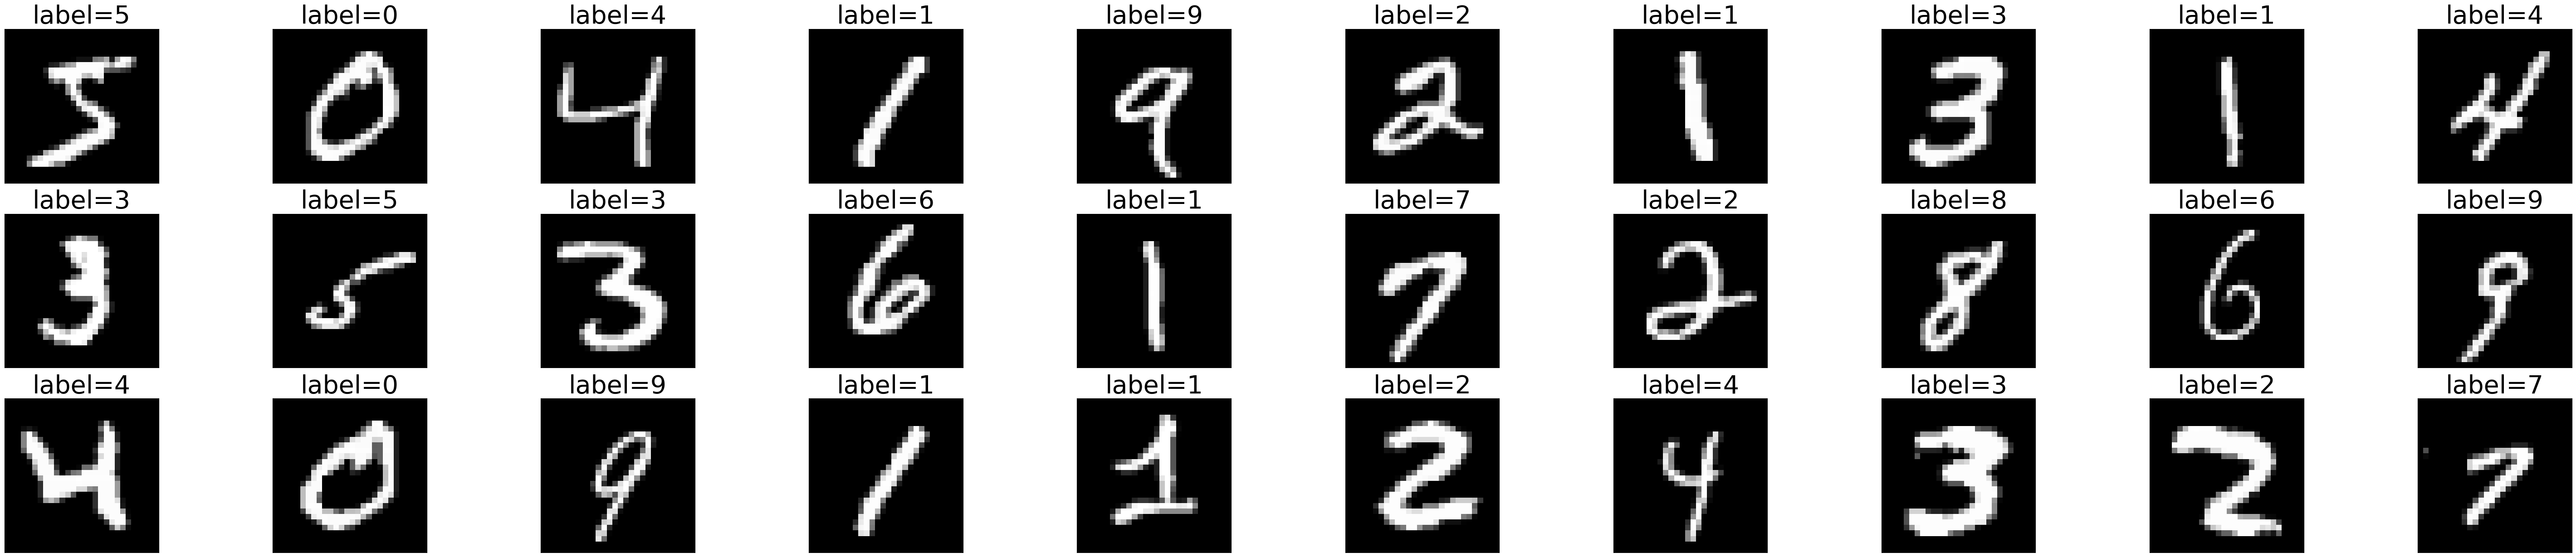

In [4]:
#show some image from MNIST dataset
imageMNIST = plt.figure(figsize=(75,15))
for i in range (30):
  ax = imageMNIST.add_subplot(3,10, i+1, xticks=[], yticks=[]) # remove xticks and yticks
  ax.imshow(np.squeeze(train_X[i]), cmap='gray')
  ax.set_title('label=' + str(train_y[i][0]), fontsize=40)

# Fill up the configuration for model

In [5]:
#Settings:
#inputShape = (height,width,depth), depth = 1 for grayscale
InputShape = (28, 28, 1)
classes = 10

#show input shape
print(InputShape)

(28, 28, 1)


# Create your own model

In [6]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")

def create_model():
    model = Sequential()

    # CNN layers  -> usually comes with Conv2D and MaxPooling together, we call it a block

    # Conv2D(32, (3, 3))
    # 32: This parameter specifies the number of filters (also known as kernels or channels) in the convolutional layer.
    # Each filter captures different features from the input data.
    # (3, 3): This parameter represents the size of each filter. In this case, it's a 3x3 filter.

    # MaxPooling2D(2, 2)
    # The max-pooling layer with a 2x2 window will divide the input feature maps into non-overlapping 2x2 regions and select the maximum value from each region.
    # This operation effectively reduces the spatial dimensions of the feature maps by a factor of 2 in both width and height.

    # CNN layers
    # 1st
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))   # (28, 28, 1) -> (26, 26, 32)
    # 2nd
    model.add(Conv2D(64, (3, 3), activation='relu'))    # (26, 26, 32) -> (24, 24, 64)
    # 3rd
    model.add(Conv2D(64, (3, 3), activation='relu'))    # (24, 24, 64) -> (22, 22, 64)
    # Flatten for NN layers
    model.add(Flatten())    # (22, 22, 64) -> (30976,)
    # NN layers
    # 1st
    model.add(Dense(256, activation='relu'))    # (30976,) -> (256,)
    # 2nd
    model.add(Dense(128, activation='relu'))    # (256,) -> (128,)
    # 3rd
    model.add(Dense(classes, activation='softmax')) # (128,) -> (10,)
    
    return model


# Create model
model = create_model()

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
#print model
model.summary()

# The output will be like this...
# Layer (type)                Output Shape              Param #
# =================================================================
# conv2d (Conv2D)             (None, 26, 26, 32)        320

# (None, 26, 26, 32)

# None: This dimension represents the batch size.
# It can be any positive integer and will be determined based on the input data provided during training or inference.
# It's essentially a placeholder for the actual batch size.

# 26: This dimension represents the height of the feature maps output by the Conv2D layer. It's determined by the size of the input data and the filter used.
# 26: This dimension represents the width of the feature maps output by the Conv2D layer. Like the height dimension, it's determined by the size of the input data and the filter used.
# 32: This dimension represents the number of filters (or channels) output by the Conv2D layer. Each filter captures different features from the input data.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 256)               7930112   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1

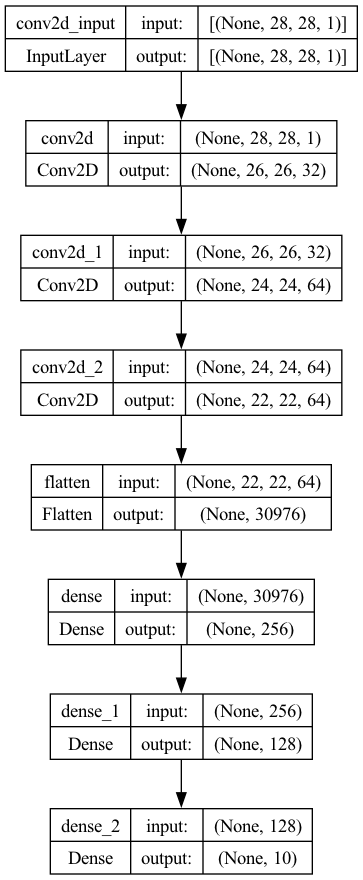

In [8]:
#plot model

# Plot model
plot_model(model, to_file='model.png', show_shapes=True)

In [9]:
# Training configuration
num_epochs = 10
num_batch_size = 128
num_validation_split = 0.2 # take 20% of training set to be validation sets


# Train model

# Be aware that the validation_split will occur first before shuffle!

history = model.fit(
    x=train_X,
    y=train_y,
    epochs=num_epochs,
    batch_size=num_batch_size,
    validation_split = num_validation_split,
    shuffle = True,
)

Epoch 1/10
375/375 [==============================] - 48s 128ms/step - loss: 0.1455 - accuracy: 0.9548 - val_loss: 0.0494 - val_accuracy: 0.9852
Epoch 2/10
375/375 [==============================] - 47s 125ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0482 - val_accuracy: 0.9855
Epoch 3/10
375/375 [==============================] - 47s 126ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 4/10
375/375 [==============================] - 53s 141ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0465 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 68s 182ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0490 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 66s 175ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0414 - val_accuracy: 0.9906
Epoch 7/10
375/375 [==============================] - 62s 166ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0436 - val_ac

In [17]:
#evalutate the model
predictions = model.predict(test_X, batch_size=num_batch_size)  # 'predictions_with_bn' contains the predicted labels from the model
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Calculate accuracy
accuracy = metrics.accuracy_score(test_y, predicted_labels)
print(f"Test Accuracy: {accuracy:.4f}")

79/79 [==============================] - 3s 33ms/step
Test Accuracy: 0.9912


In [11]:
# history is a dictionary that contains the loss and accuracy values during training
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

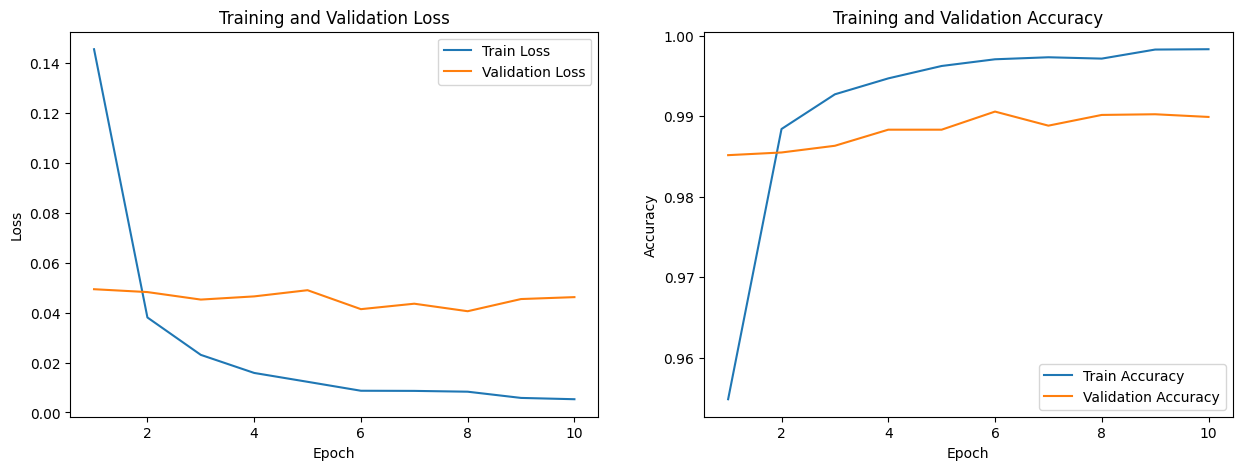

In [12]:
#plot and print

# Access the training history from the `history` object
# train
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
# validation
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, num_epochs + 1)

# Create 2 plots for loss and accuracy in the same figure
plt.figure(figsize=(15, 5))
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plot certain image from dataset and successively predict

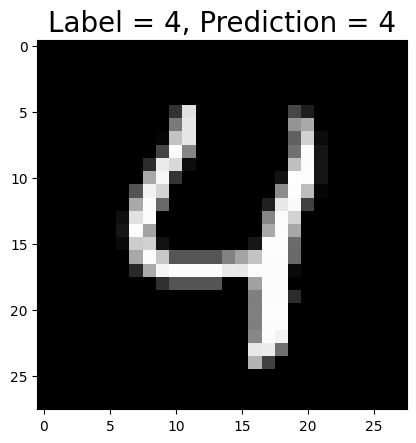

In [18]:
#predict certian image from test dataset
#show image
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.title(f'Label = {test_y[4][0]}, Prediction = {predicted_labels[4]}', fontsize=20)
plt.show()

In [16]:
#predict result
image1 = image1.reshape(-1,28,28,1)
prediction = model.predict([image1])
print('predicted(with batch normalization): {}'.format(np.argmax(prediction)))

1/1 [==============================] - 0s 46ms/step
predicted(with batch normalization): 4
